We will try differents methods to select the number of principalcomponents


In [3]:
# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# import PCA
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# import knee detection algorithm
from kneed import KneeLocator

# set sns theme and set pandas to display all rows and columns
sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 6]

Load the dataset

/var/folders/h2/hlt0n3hj3jx4phv5m7ncq2180000gn/T/ipykernel_3125/1858711220.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


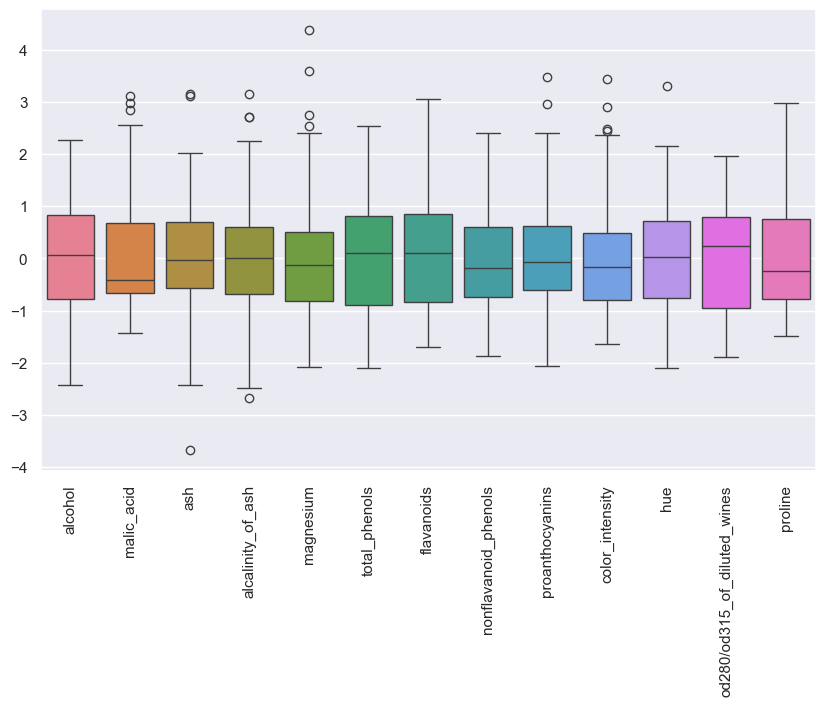

In [4]:
# Load the wine dataset
wine_data = load_wine()

wine_df_numeric = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df = wine_df_numeric.copy()
wine_df['label'] = wine_data.target

# Normalize the data
standard_scaler = StandardScaler()
standard_scaler.fit(wine_df_numeric)
wine_df_numeric_scaled = standard_scaler.transform(wine_df_numeric)

# Create data df
wine_df_numeric = pd.DataFrame(
    wine_df_numeric_scaled, 
    columns = wine_df_numeric.columns
)

g = sns.boxplot(wine_df_numeric)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [5]:
# Run full PCA
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
print('\nVariances explained by components:')

[var_ration*100 for var_ration in pca.explained_variance_ratio_]

Number of PCA components 13

Variances explained by components:


[np.float64(36.19884809992634),
 np.float64(19.20749025700894),
 np.float64(11.123630536249978),
 np.float64(7.069030182714026),
 np.float64(6.563293679648597),
 np.float64(4.935823319222569),
 np.float64(4.23867932262332),
 np.float64(2.680748948378865),
 np.float64(2.2221534047897094),
 np.float64(1.9300190939440804),
 np.float64(1.7368356899899104),
 np.float64(1.2982325756042123),
 np.float64(0.7952148898994491)]

In [6]:
# Perform PCA and choose two components
pca = PCA(n_components=2)
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
print('\nVariances explained by components:')

[var_ration*100 for var_ration in pca.explained_variance_ratio_]

Number of PCA components 2

Variances explained by components:


[np.float64(36.19884809992634), np.float64(19.20749025700894)]

In [7]:
# Perform PCA and choose number of components based on desired percent of explained variance
pca = PCA(n_components=0.7)
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

print('\nVariances explained by components:')
print([var_ration*100 for var_ration in pca.explained_variance_ratio_])

explained_sum = sum([var_ration*100 for var_ration in pca.explained_variance_ratio_])
print('\nTotal variance explained by returned components : {}'.format(explained_sum))


Number of PCA components 4

Variances explained by components:
[np.float64(36.19884809992634), np.float64(19.20749025700894), np.float64(11.123630536249978), np.float64(7.069030182714026)]

Total variance explained by returned components : 73.59899907589929


## Selecting right number of principle components - cumulative variance

Number of PCA components 13


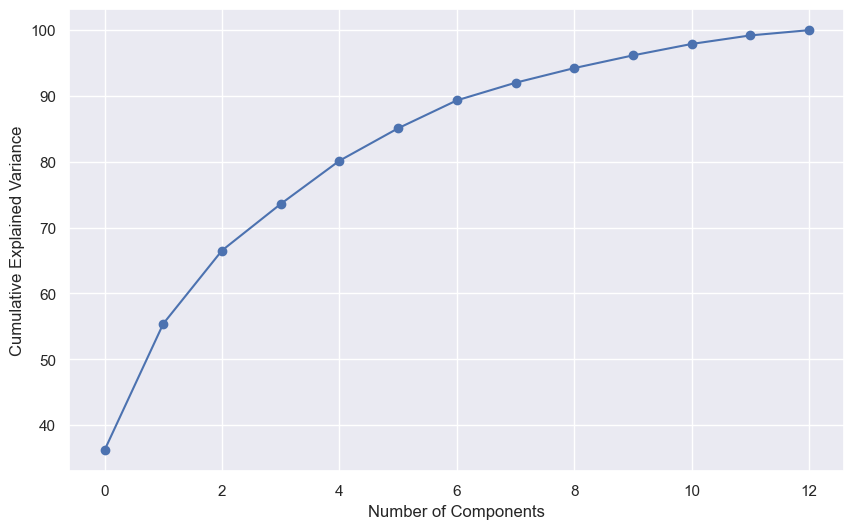

In [8]:
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.scatter(range(len(cumulative_explained_variance)),cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [9]:
pca_transformed_data

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]],
      shape=(178, 13))

In [10]:
pca_transformed_data.shape

(178, 13)

In [11]:
cumulative_explained_variance

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

## Selecting right number of principle components - using elbow method



In [12]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')

mnist_data = mnist.data.values
mnist_label = mnist.target

In [13]:
mnist_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [14]:
mnist_data.shape

(70000, 784)

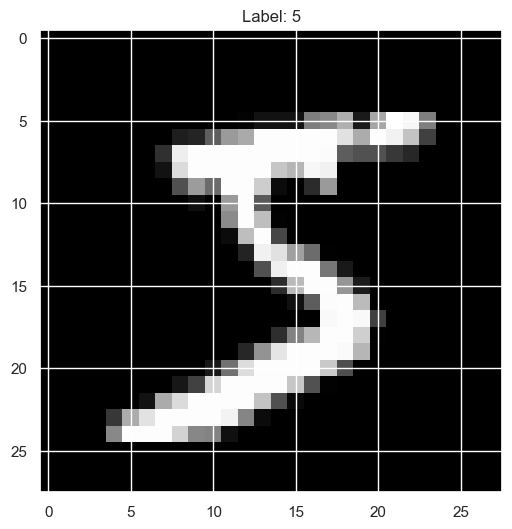

In [15]:
# Reshape image
image = np.reshape(mnist_data[0,:], [28,28])

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

In [16]:
# Custom normalization
mnist_data = mnist_data/255

Number of PCA components 784


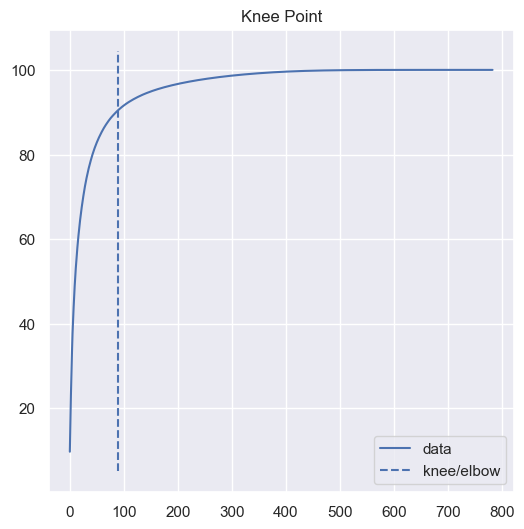

In [17]:
# Perform PCA
pca = PCA()
pca.fit(mnist_data)
pca_transformed_data = pca.transform(mnist_data)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

kneedle = KneeLocator(
    range(len(cumulative_explained_variance)), 
    cumulative_explained_variance, 
    curve="concave", 
    direction="increasing"
)
kneedle.plot_knee()

In [18]:
kneedle.elbow

np.int64(90)

In [19]:
# Perform PCA
pca = PCA(n_components=kneedle.elbow)
pca.fit(mnist_data)
pca_transformed_data = pca.transform(mnist_data)

In [20]:
pca_transformed_data.shape

(70000, 90)

In [21]:
reverse_transformed_data = pca.inverse_transform(pca_transformed_data)
unscaled_data = reverse_transformed_data * 255 

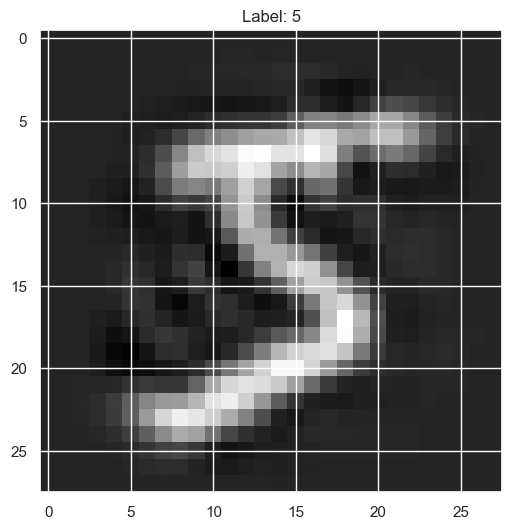

In [22]:
image = np.reshape(unscaled_data[0,:], [28,28])

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

Denoising using PCA

In [23]:
mnist = fetch_openml('mnist_784', parser='auto')

mnist_data = mnist.data.values
mnist_label = mnist.target

In [24]:
mnist_data = mnist_data/255

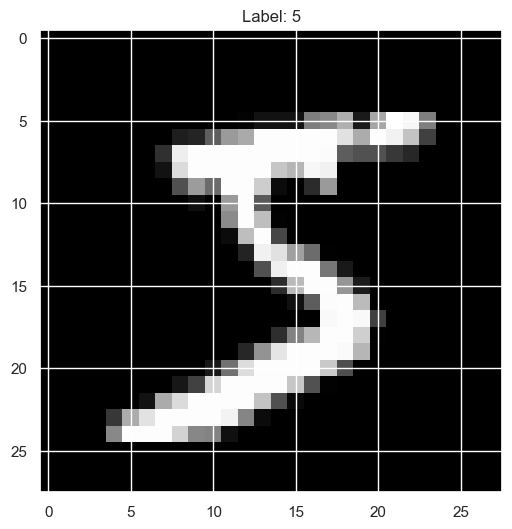

In [25]:
image = np.reshape(mnist_data[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

Visualize a digit image from the MNIST dataset, which contains grayscale images of handwritten digits (28x28 pixels).

1. **Reshaping the Data**:
   ```python
   image = np.reshape(mnist_data[0,:], [28,28])
   ```
   - This takes the first row of `mnist_data` (a flat array of size 784 for each image) and reshapes it into a 2D array of shape (28, 28), which represents the original image dimensions.

2. **Plotting the Image**:
   ```python
   plt.imshow(image, cmap='gray')
   ```
   - `plt.imshow()` displays the 2D array as an image.
   - `cmap='gray'` ensures the image is rendered in grayscale.

3. **Adding a Title**:
   ```python
   plt.title(f"Label: {mnist_label[0]}")
   ```
   - Adds a title to the plot showing the corresponding label from `mnist_label[0]`.

4. **Displaying the Image**:
   ```python
   plt.show()
   ```
   - Displays the image plot.


In [26]:
noise = np.random.normal(0, 0.2, mnist_data.shape)
mnist_data_noisy = mnist_data + noise


1. **Generating Noise**:
   ```python
   noise = np.random.normal(0, 0.2, mnist_data.shape)
   ```
   - `np.random.normal(0, 0.2, mnist_data.shape)` generates random values from a normal (Gaussian) distribution.
   - The mean of the distribution is `0` and the standard deviation is `0.2`.
   - The size of the generated noise array is the same as the shape of `mnist_data`, ensuring element-wise addition is possible.

2. **Adding Noise to Data**:
   ```python
   mnist_data_noisy = mnist_data + noise
   ```
   - Element-wise addition adds the generated noise to each corresponding pixel value in `mnist_data`.
   - The result is stored in `mnist_data_noisy`.


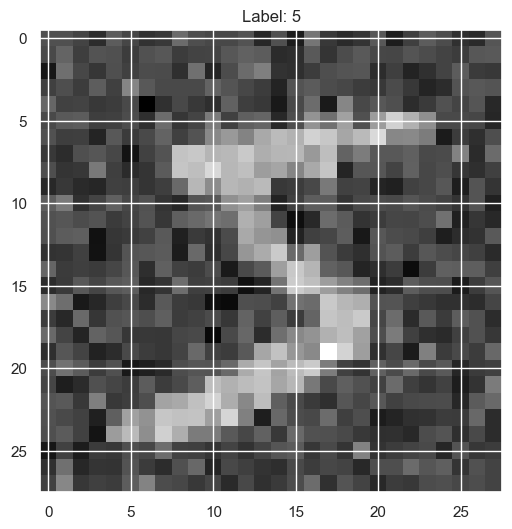

In [27]:
image = np.reshape(mnist_data_noisy[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

Number of PCA components 784


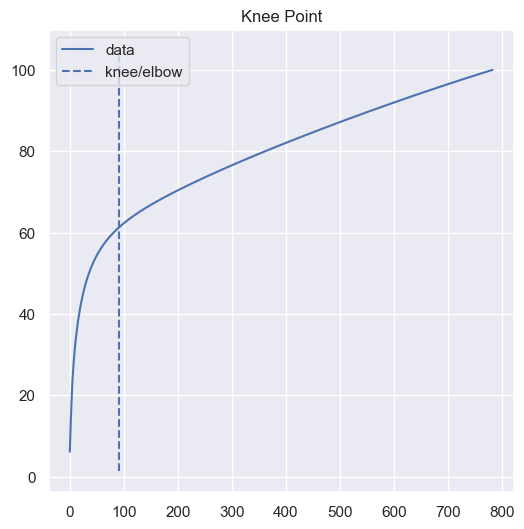

In [28]:
# Denoise with PCA
pca = PCA()
pca.fit(mnist_data_noisy)
pca_transformed_data = pca.transform(mnist_data_noisy)
print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

kneedle = KneeLocator(
    range(len(cumulative_explained_variance)), 
    cumulative_explained_variance, 
    S=1.0, 
    curve="concave", 
    direction="increasing"
)
kneedle.plot_knee()

This code performs Principal Component Analysis (PCA) on the noisy MNIST dataset, determines the optimal number of components to retain using the elbow/knee method, and visualizes the process with the **KneeLocator** library.

---

### Step 1: **Perform PCA on the Noisy Data**
```python
pca = PCA()
pca.fit(mnist_data_noisy)
pca_transformed_data = pca.transform(mnist_data_noisy)
```
- **PCA Initialization**: `PCA()` creates an instance of PCA from `sklearn.decomposition`.
- **Fitting PCA**: `pca.fit()` identifies the principal components and computes the explained variance for each.
- **Transforming Data**: `pca.transform()` projects the data into the PCA-transformed feature space.

---

### Step 2: **Print the Number of Components**
```python
print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
```
- After applying PCA, the transformed data still retains the original number of features (784 for flattened MNIST data). However, many components may have negligible variance and can be discarded.

---

### Step 3: **Compute Cumulative Explained Variance**
```python
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100
```
- `pca.explained_variance_ratio_` contains the variance explained by each principal component as a proportion of the total variance.
- `np.cumsum()` computes the cumulative sum, providing a percentage of the total variance explained as more components are added.

---

### Step 4: **Find the Optimal Number of Components (Elbow/Knee Method)**
```python
kneedle = KneeLocator(
    range(len(cumulative_explained_variance)), 
    cumulative_explained_variance, 
    S=1.0, 
    curve="concave", 
    direction="increasing"
)
```
- **KneeLocator** identifies the "knee" in the curve, where adding more components provides diminishing returns in explained variance.
- `S=1.0`: Sensitivity parameter; higher values make the detection more stringent.
- `curve="concave"` and `direction="increasing"` specify the shape of the cumulative variance curve.

---

### Step 5: **Plot the Knee Point**
```python
kneedle.plot_knee()
```
- This plots the cumulative explained variance against the number of components.
- The "knee point" marks the optimal number of components to retain, balancing dimensionality reduction and information preservation.

---

In [29]:
kneedle.elbow

np.int64(91)

In [30]:
pca = PCA(n_components=kneedle.elbow)
pca.fit(mnist_data_noisy)
pca_transformed_data = pca.transform(mnist_data_noisy)

In [31]:
pca_transformed_data.shape

(70000, 91)

In [32]:
reverse_transformed_data = pca.inverse_transform(pca_transformed_data)
unscaled_data = reverse_transformed_data * 255 

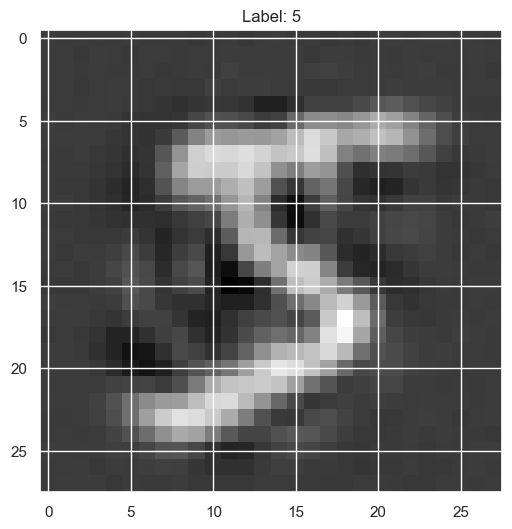

In [33]:
image = np.reshape(unscaled_data[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

In [34]:
#Displaying digit dataset with PCA

In [35]:
pca = PCA()
pca.fit(mnist_data)
pca.explained_variance_ratio_[:2]*100

array([9.74611592, 7.15544459])

Text(0, 0.5, 'PC1 [7.1 % variance]')

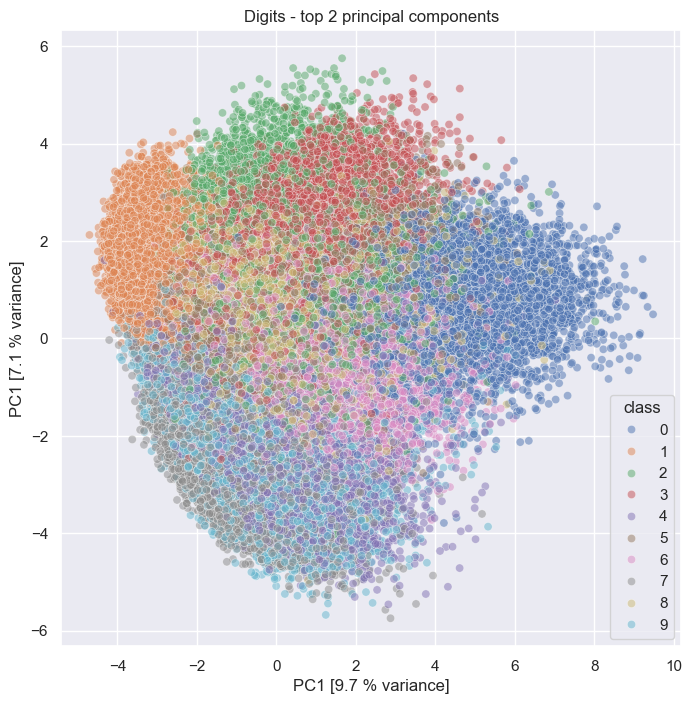

In [36]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=pca_transformed_data[:,0], y=pca_transformed_data[:,1], hue=mnist_label, alpha=0.5)

plt.title('Digits - top 2 principal components')
plt.xlabel('PC1 [9.7 % variance]')
plt.ylabel('PC1 [7.1 % variance]')